# UPenn Student Mturk Results

In [ ]:
import pandas as pd

In [ ]:
upenn_df = pd.read_csv('class_mturk_results.csv')

In [ ]:
# number of results
len(upenn_df)

97

In [ ]:
upenn_df.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.input',
       'Answer.Fact.fact', 'Answer.Myth.myth', 'Answer.No.no',
       'Answer.Yes.yes', 'Answer.aiName', 'Answer.factSource',
       'Answer.sentence', 'Approve', 'Reject'],
      dtype='object')

In [ ]:
len(upenn_df['WorkerId'].unique())

13

In [ ]:
print('Number of Statements labeled facts:')
print(len(upenn_df[upenn_df['Answer.Fact.fact'] == True]))

Number of Statements labeled facts:
43


In [ ]:
print('Number of Statements labeled myth:')
print(len(upenn_df[upenn_df['Answer.Myth.myth'] == True]))

Number of Statements labeled myth:
53


In [ ]:
# a worker responded with neither fact or myth
upenn_df[(upenn_df['Answer.Fact.fact'] == False) & (upenn_df['Answer.Myth.myth'] == False)]

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Input.input,Answer.Fact.fact,Answer.Myth.myth,Answer.No.no,Answer.Yes.yes,Answer.aiName,Answer.factSource,Answer.sentence,Approve,Reject
78,30EMX9PEW4HYTKICLG7J4KPDGV4SKT,3CM00QMEU6K4RDMFXAT0B6G6JT46W5,Fact or Fiction,"Please submit an interesting fact or myth, and...",survey,$0.00,Fri Nov 29 10:40:34 PST 2024,100,BatchId:411347;OriginalHitTemplateId:921587278;,3600,...,Wildlife Conservation,False,False,True,False,NaN,https://en.wikipedia.org/wiki/Lists_of_extinct...,DoDo birds are not extinct.,NaN,NaN


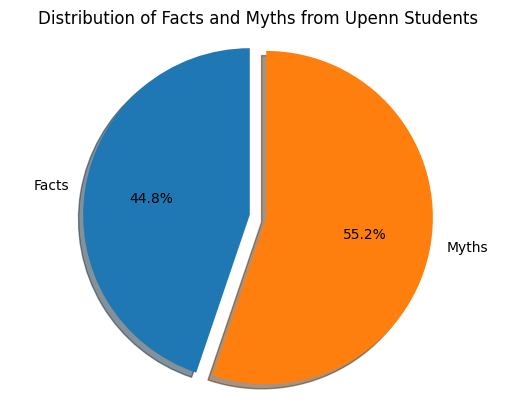

In [ ]:
import matplotlib.pyplot as plt
num_facts = len(upenn_df[upenn_df['Answer.Fact.fact'] == True])
num_myths = len(upenn_df[upenn_df['Answer.Myth.myth'] == True])

# Create a pie chart
labels = ['Facts', 'Myths']
sizes = [num_facts, num_myths]
explode = (0.1, 0)  # Explode the 'Facts' slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Facts and Myths from Upenn Students')
plt.show()

## Sentiment Analysis

In [ ]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

### Submited Facts

In [ ]:
fact_statements = upenn_df[upenn_df['Answer.Fact.fact'] == True]

fact_statements['sentiment'] = fact_statements['Answer.sentence'].apply(get_sentiment)
print(fact_statements[['Answer.sentence', 'sentiment']].head())

                                      Answer.sentence  sentiment
5   Earth's temperatue has risen by about .11 degr...       0.00
7   The studies and media comments from scientists...       0.00
9   Space exploration is the use of astronomy and ...       0.00
13  Elon Musk, CEO of SpaceX, has announced plans ...       0.00
15  Space X is the first company that reuse boosters.       0.25


<ipython-input-23-d5ed6358bee9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_statements['sentiment'] = fact_statements['Answer.sentence'].apply(get_sentiment)


In [ ]:
print(f"Average sentiment in fact statements: {fact_statements['sentiment'].mean()}")

Average sentiment in fact statements: 0.07522609819121448


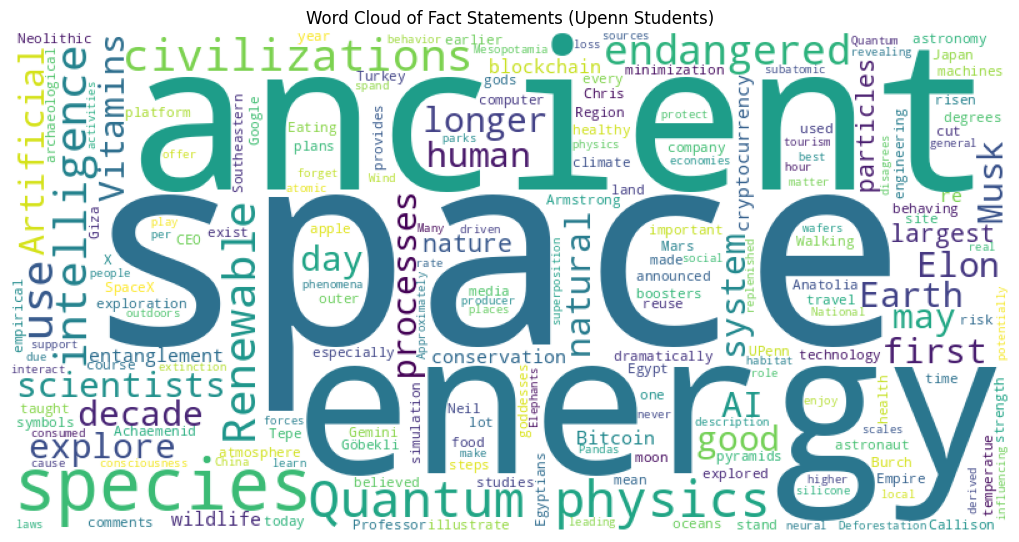

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

text = " ".join(fact_statements['Answer.sentence'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(text
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of Fact Statements (Upenn Students)")
plt.show()

### Submited Myths

In [ ]:
myth_statements = upenn_df[upenn_df['Answer.Myth.myth'] == True]
myth_statements['sentiment'] = myth_statements['Answer.sentence'].apply(get_sentiment)

print(myth_statements[['Answer.sentence', 'sentiment']].head())

                                     Answer.sentence  sentiment
0  Climate change is a natural cycle and not infl...     0.0500
1  As climate change progresses, everywhere will ...     0.0000
2  Japan would be sunk in 20 years due to global ...    -0.0625
3                         Climate Change is not real    -0.1000
4                Climate change is not human caused.     0.0000


<ipython-input-28-346cb6082f99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myth_statements['sentiment'] = myth_statements['Answer.sentence'].apply(get_sentiment)


In [ ]:
print(f"Average sentiment in myth statements: {myth_statements['sentiment'].mean()}")

Average sentiment in myth statements: 0.0029368823000898597


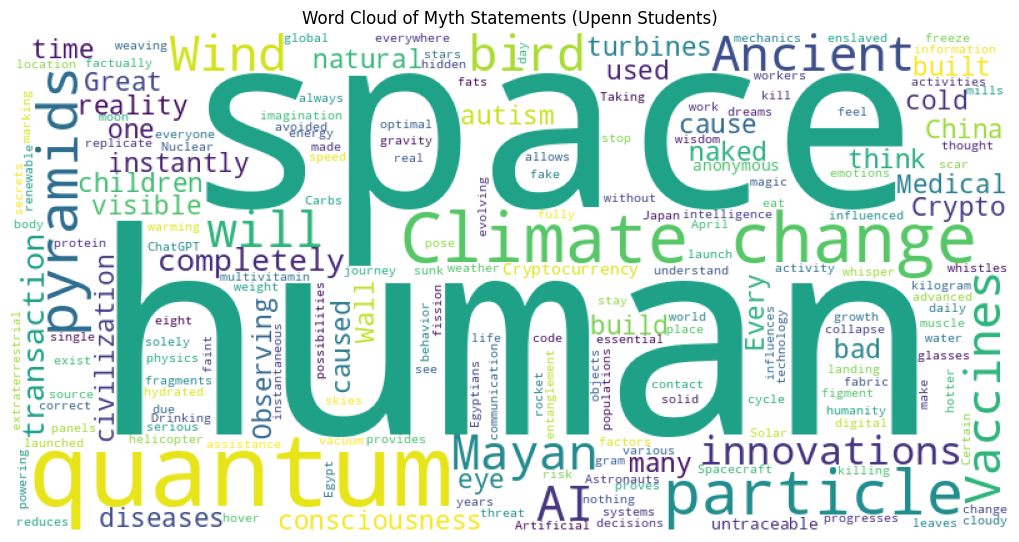

In [33]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

text = " ".join(myth_statements['Answer.sentence'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of Myth Statements (Upenn Students)")
plt.show()

 How extreme the sentiments are

In [ ]:
import numpy as np

fact_sentiment_std = np.std(fact_statements['sentiment'])
myth_sentiment_std = np.std(myth_statements['sentiment'])

print(f"Standard deviation of sentiment in fact statements: {fact_sentiment_std}")
print(f"Standard deviation of sentiment in myth statements: {myth_sentiment_std}")

fact_sentiment_iqr = np.percentile(fact_statements['sentiment'], 75) - np.percentile(fact_statements['sentiment'], 25)
myth_sentiment_iqr = np.percentile(myth_statements['sentiment'], 75) - np.percentile(myth_statements['sentiment'], 25)

print(f"Interquartile range of sentiment in fact statements: {fact_sentiment_iqr}")
print(f"Interquartile range of sentiment in myth statements: {myth_sentiment_iqr}")

fact_sentiment_range = np.max(fact_statements['sentiment']) - np.min(fact_statements['sentiment'])
myth_sentiment_range = np.max(myth_statements['sentiment']) - np.min(myth_statements['sentiment'])

print(f"Range of sentiment in fact statements: {fact_sentiment_range}")
print(f"Range of sentiment in myth statements: {myth_sentiment_range}")

Standard deviation of sentiment in fact statements: 0.2595256600898984
Standard deviation of sentiment in myth statements: 0.26301359831492177
Interquartile range of sentiment in fact statements: 0.15
Interquartile range of sentiment in myth statements: 0.05
Range of sentiment in fact statements: 1.6
Range of sentiment in myth statements: 1.5


# Genral Mturk Results

In [ ]:
mturk_df = pd.read_csv('/content/regular_mturk_responses.csv')

In [ ]:
len(mturk_df)

100

In [ ]:
mturk_df.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Answer.Fact.fact',
       'Answer.Myth.myth', 'Answer.No.no', 'Answer.Yes.yes', 'Answer.aiName',
       'Answer.factSource', 'Answer.sentence', 'Approve', 'Reject'],
      dtype='object')

In [ ]:
len(mturk_df['WorkerId'].unique())

100

In [35]:
print('Number of Statements labeled facts:')
print(len(mturk_df[mturk_df['Answer.Fact.fact'] == True]))

Number of Statements labeled facts:
63


In [36]:
print('Number of Statements labeled myth:')
print(len(mturk_df[mturk_df['Answer.Myth.myth'] == True]))

Number of Statements labeled myth:
37


In [37]:
# a worker responded with neither fact or myth
mturk_df[(mturk_df['Answer.Fact.fact'] == False) & (mturk_df['Answer.Myth.myth'] == False)]

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Last7DaysApprovalRate,Answer.Fact.fact,Answer.Myth.myth,Answer.No.no,Answer.Yes.yes,Answer.aiName,Answer.factSource,Answer.sentence,Approve,Reject


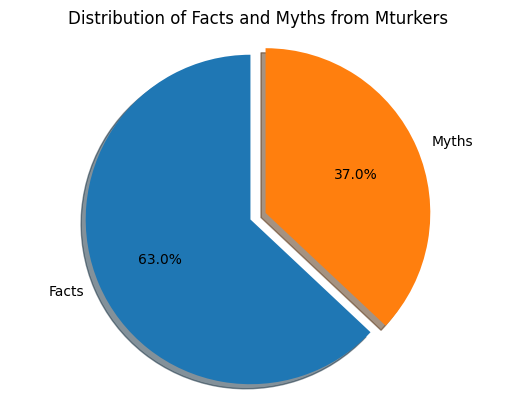

In [40]:
import matplotlib.pyplot as plt
num_facts = len(mturk_df[mturk_df['Answer.Fact.fact'] == True])
num_myths = len(mturk_df[mturk_df['Answer.Myth.myth'] == True])

labels = ['Facts', 'Myths']
sizes = [num_facts, num_myths]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Distribution of Facts and Myths from Mturkers')
plt.show()

## Sentiment Analysis

In [41]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

### Submited Facts

In [42]:
fact_statements = mturk_df[mturk_df['Answer.Fact.fact'] == True]

fact_statements['sentiment'] = fact_statements['Answer.sentence'].apply(get_sentiment)
print(fact_statements[['Answer.sentence', 'sentiment']].head())

                                     Answer.sentence  sentiment
0  A user enters the sentence they wish to classi...        0.0
1  Would you like assistance structuring the rema...        0.0
3            A group of owls is called a parliament.        0.0
4                                yes i want classify        0.0
7                          The Earth orbits the Sun.        0.0


<ipython-input-42-2b9dfa9af8ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_statements['sentiment'] = fact_statements['Answer.sentence'].apply(get_sentiment)


In [43]:
print(f"Average sentiment in fact statements: {fact_statements['sentiment'].mean()}")

Average sentiment in fact statements: 0.05081976224833368


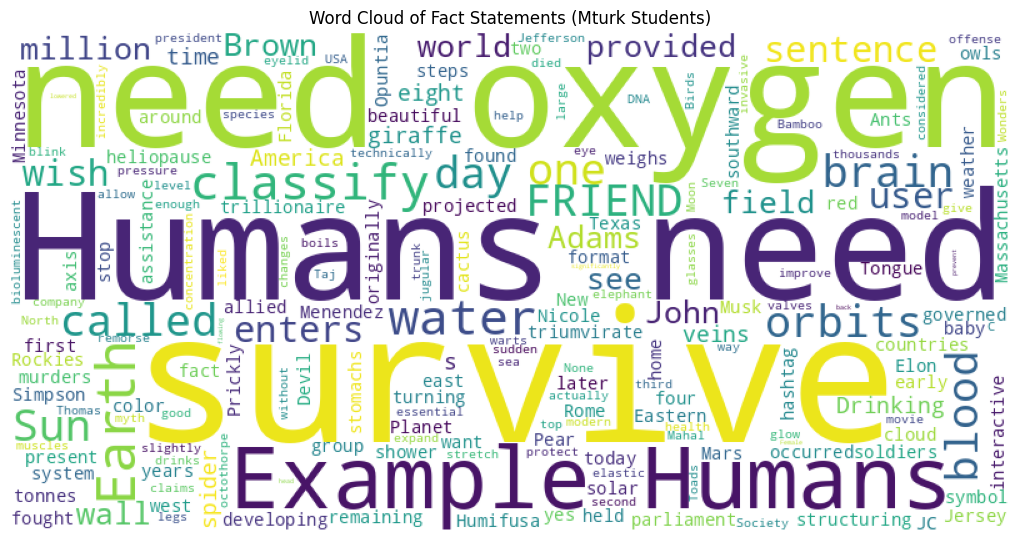

In [44]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

text = " ".join(fact_statements['Answer.sentence'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of Fact Statements (Mturk Students)")
plt.show()

### Submited Myths

In [45]:
myth_statements = mturk_df[mturk_df['Answer.Myth.myth'] == True]
myth_statements['sentiment'] = myth_statements['Answer.sentence'].apply(get_sentiment)

print(myth_statements[['Answer.sentence', 'sentiment']].head())

                                      Answer.sentence  sentiment
2                     Cold weather can make you sick.  -0.657143
5                A cause of autism is from a vaccine.   0.000000
6   Sure! Please go ahead and input the sentence y...   0.625000
10                             Blood is actually blue   0.000000
13                              Vaccines cause autism   0.000000


<ipython-input-45-57ecb6b896bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myth_statements['sentiment'] = myth_statements['Answer.sentence'].apply(get_sentiment)


In [46]:
print(f"Average sentiment in myth statements: {myth_statements['sentiment'].mean()}")

Average sentiment in myth statements: -0.004101244101244092


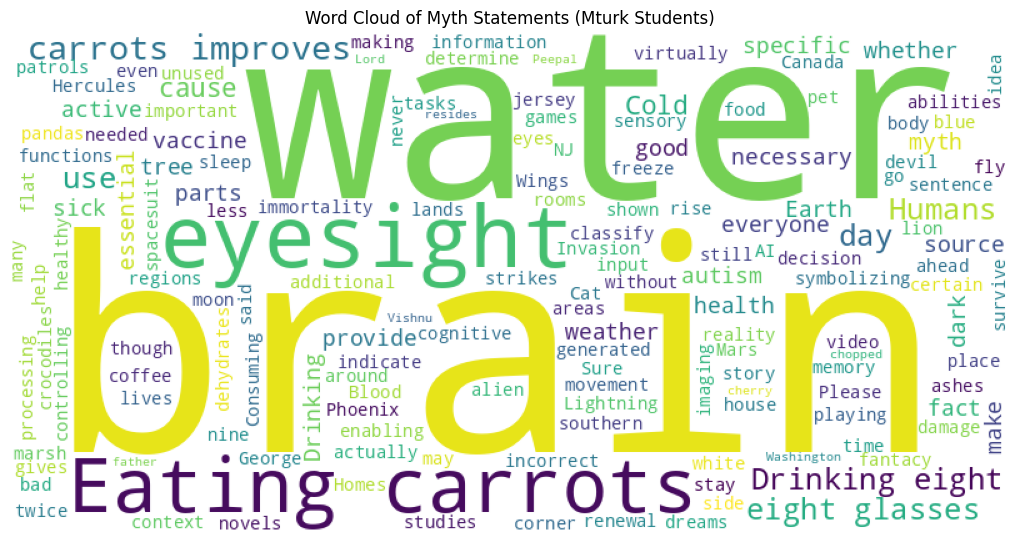

In [47]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

text = " ".join(myth_statements['Answer.sentence'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of Myth Statements (Mturk Students)")
plt.show()

 How extreme the sentiments are

In [48]:
import numpy as np

fact_sentiment_std = np.std(fact_statements['sentiment'])
myth_sentiment_std = np.std(myth_statements['sentiment'])

print(f"Standard deviation of sentiment in fact statements: {fact_sentiment_std}")
print(f"Standard deviation of sentiment in myth statements: {myth_sentiment_std}")

fact_sentiment_iqr = np.percentile(fact_statements['sentiment'], 75) - np.percentile(fact_statements['sentiment'], 25)
myth_sentiment_iqr = np.percentile(myth_statements['sentiment'], 75) - np.percentile(myth_statements['sentiment'], 25)

print(f"Interquartile range of sentiment in fact statements: {fact_sentiment_iqr}")
print(f"Interquartile range of sentiment in myth statements: {myth_sentiment_iqr}")

fact_sentiment_range = np.max(fact_statements['sentiment']) - np.min(fact_statements['sentiment'])
myth_sentiment_range = np.max(myth_statements['sentiment']) - np.min(myth_statements['sentiment'])

print(f"Range of sentiment in fact statements: {fact_sentiment_range}")
print(f"Range of sentiment in myth statements: {myth_sentiment_range}")

Standard deviation of sentiment in fact statements: 0.15519715581610277
Standard deviation of sentiment in myth statements: 0.308686651852722
Interquartile range of sentiment in fact statements: 0.0
Interquartile range of sentiment in myth statements: 0.0
Range of sentiment in fact statements: 0.8916666666666666
Range of sentiment in myth statements: 1.5
